
 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment 01 - KNN : </b> Welcome to the programming assignment (PA) on k-nearest neighbors (KNN) classification. Throughout this PA, you will explore the k-NN algorithm, a versatile and intuitive method for tackling classification and regression challenges. Specifically, this assignment aims to enhance your understanding of the KNN classification algorithm. In this PA, we expect you to implement and experiment with the KNN classifier to understand how variations in 'k' and distance metrics influence classification performance.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions are not accepted
3. Please DO NOT use any machine learning libraries unless and otherwise specified.



<b> Part(a): Synthetic data generation </b>  

1. Consider four bivariate Gaussians with means at (0,0), (0,1), (1,0), and (1,1), each having a variance of 0.3. Sample 90 points from each Gaussian, resulting in a total of 360 points. Allocate 30 points from each Gaussian for training and 60 points for testing. This results in a total of 120 points for training and 240 points for testing.
2. Create a 2-class training set ($[X_{train}, Y_{train}]$) and a test set ($[X_{test}, Y_{test}]$) by labeling the data sampled from Gaussians with means at (0,0) and (1,1) as class 1, and the data sampled from Gaussians with means at (0,1) and (1,0) as class 2. Assign a label of +1 to class1 and -1 to class2.

4. Visualize both train and test sets using the scatter plot on a 2-D plane. Indicate the data points from class 1 with a green color and those from class 2 with a blue color.

<b> Part(b): KNN Classification - </b> The k-Nearest Neighbors (KNN) classifier algorithm is a straightforward yet powerful tool for classification tasks. The KNN classifier takes the test data point, computes distances to all points in the training set, identifies the 'k' nearest neighbors based on these distances, and assigns the test data to the class that the majority of its neighbors belong to.

<b> Programming questions </b>


1. Write a function called kNNClassify that accepts training data, a test point, and the hyperparameter 'k' as input and returns the label of the test point. Pick a reasonable 'k' for this experiment. Use "kNNClassify" function to generate the labels for the test data generated in part(a) of this PA. Compare the predicted labels with the original labels and calculate the portion of test data points that are correctly classified. In other words, calculate the accuracy of the classifier.
3. Create a visual representation of the predictions by plotting all data points in a 2D plane. Assign green and blue colors to represent class 1 and class 2, respectively. For test data points that are misclassified, assign the color red.
4. Generate and visualize the decision regions of 2D plane that are associated with each class, for a given classifier. Decision regions can be created by classifying all the data points in the 2D grid and assigning class-specific colors to them.

<b> Part(c): Parameter selection: What is good value for k? - </b> One intuitive approach to determine the optimal 'k' is through cross-validation. During cross-validation, a ρ% portion of the training dataset is utilized as the validation dataset, and the model's performance is assessed on this validation set with various 'k' values. Through these cross-validation experiments, we select the 'k' that yields the best performance on the validation data.

<b> Algorithm </b>

1. Perform hold-out cross-validation by setting aside a fraction (ρ of the training set for validation. Note: You may use ρ = 0.3, and repeat the procedure 10 times. The hold-out procedure may be quite unstable.
2. Use a large range of candidate values for k (e.g. k = 1, 3, 5..., 21). Notice odd numbers are considered to avoid ties.
3. Repeat the process for 10 times using a random cross-validation set each time with a ρ = 0.3.
4. Plot the training and validation errors for the different values of k.

<b> Questions </b>

5. How would you now answer the question "what is the best value for k"?
6. How is the value of k affected by ρ (percentage of points held out) and number of repetitions? What does a large number of repetitions provide?
7. Apply the model obtained by cross-validation (i.e., best k) to the test set and check
if there is an improvement on the classification error over the result of Part 2.

<b> Part(d): Influence of training data on KNN classifier - </b>

1. Evaluate the performance as the size of the training set
grows, e.g., n = {200, 400, 1200,...}. How would you choose a good range for k as n changes? What can you say about the stability of the solution? Check by repeating the validation multiple times.
2. Try classifying more difficult datasets, for instance, by increasing the variance or adding noise by randomly flipping the labels on the training set.

<b> Part(e): What is the influence of distance measure on decision regions ? - </b>

1. Evaluate the performance of the KNN classifier with different distance measures such as $l_{1}$, $l_{2}$, etc,.
2. Plot the decision regions of the KNN classifier with different distance measures.
3. Report your observations.  

<b> Part(f): MNIST Digit classification using KNN classifier: </b> : This part will not be graded. However, you are recommended to work on it to get exposure to the practical applications of the KNN classifier.

1. Modify the function kNNClassify to handle multi-class problems and hence design a KNN classifier to classify the images in MNIST dataset as one of the 10 digits. The 28x28 images may be flattened to arrive at a 784 dimensional vector. NOTE: If you had already written a kNNClassify for multi class classification in part1 (b), you are free to use it.
2. The MNIST dataset consists of approximately 70,000 images of handwritten digits. Create training, validation, and test datasets from this entire dataset with the respective proportions of 80%, 10%, and 10%.
3. Empirically determine the most suitable error function, and the corresponding k to maximize the performance on the cross-validation experiments.
4. Apply these values to evaluate the performance on the test dataset.
5. Create a confusion matrix to understand the most confused classes (digits).
6. Suggest alternate ways to improve the performance.



In [1]:
#All imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import random
import math
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

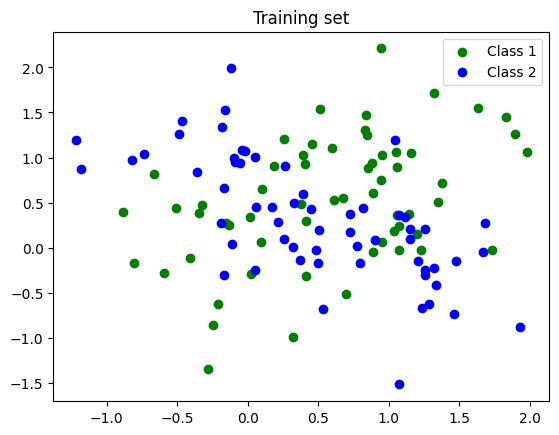

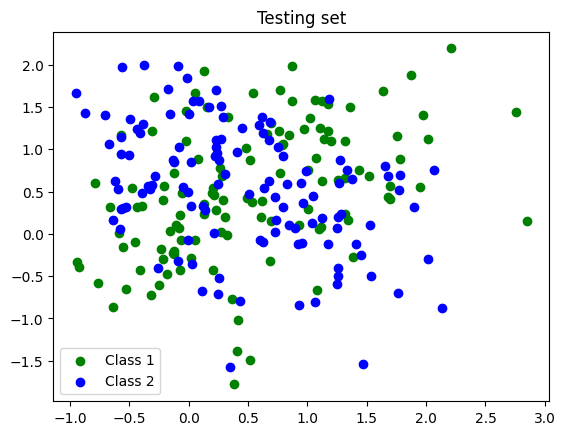

In [ ]:
########################################
#Part(a) #Synthetic data generation
########################################
#Define means and covariances
mean1=[0,0]
mean2=[0,1]
mean3=[1,0]
mean4=[1,1]
cov=[[0.3,0],[0,0.3]]

#Sample data points from the bivariate Gaussian distribution
#You can use "np.random.multivariate_normal" function to sample the data points from the multivariate Gaussian distribution
sample1=np.random.multivariate_normal(mean1,cov,90)
sample2=np.random.multivariate_normal(mean2,cov,90)
sample3=np.random.multivariate_normal(mean3,cov,90)
sample4=np.random.multivariate_normal(mean4,cov,90)

#convert samples into list
ps1=sample1.tolist()
ps2=sample2.tolist()
ps3=sample3.tolist()
ps4=sample4.tolist()


#Generate training data
c1=random.sample(ps1,30)
c4=random.sample(ps4,30)
t1=c1+c4
z1=[1 for i in range(60)]

c2=random.sample(ps2,30)
c3=random.sample(ps3,30)
t2=c2+c3
z2=[-1 for i in  range(60)]

X_train=t1+t2
X_train=np.array(X_train)

Y_train=z1+z2
Y_train=np.array(Y_train)

Training_set=[X_train,Y_train]


#Generate testing data
d1=[]
for i in range(90):
    if ps1[i] not in c1:
        d1.append(ps1[i])
    if ps4[i] not in c4:
        d1.append(ps4[i])

d2=[]
for i in range(90):
    if ps2[i] not in c2:
        d2.append(ps2[i])
    if ps3[i] not in c3:
        d2.append(ps3[i])

t3=d1
z3=[1 for i in range(120)]

t4=d2
z4=[-1 for i in range(120)]

X_test=t3+t4
X_test=np.array(X_test)

Y_test=z3+z4
Y_test=np.array(Y_test)

Test_data=[X_test,Y_test]

#Visualize the data using plt.scatter() function
x1=[t1[i][0] for i in range(0,60)]
y1=[t1[i][1] for i in range(0,60)]

x2=[t2[i][0] for i in range(0,60)]
y2=[t2[i][1] for i in range(0,60)]

plt.scatter(x1,y1,color="g",label="Class 1")
plt.scatter(x2,y2,color="b",label="Class 2")
plt.legend()
plt.title("Training set")
plt.show()

x3=[t3[i][0] for i in range(0,120)]
y3=[t3[i][1] for i in range(0,120)]

x4=[t4[i][0] for i in range(0,120)]
y4=[t4[i][1] for i in range(0,120)]

plt.scatter(x3,y3,color="g",label="Class 1")
plt.scatter(x4,y4,color="b",label="Class 2")
plt.legend()
plt.title("Testing set")
plt.show()





Accuracy of model is : 59.166666666666664


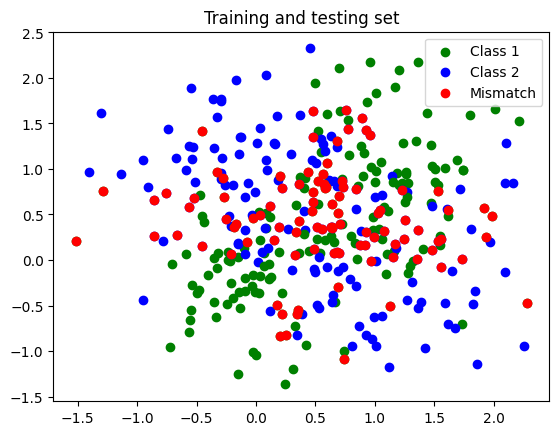

In [ ]:
from itertools import accumulate
########################################
#Part(b) #KNN classification
########################################

#Write "kNNClassify" function
def kNNClassify(X_train,Y_train,X_test,k):
  pred=[]
  for i in range(len(X_test)):
      dist=[]
      for j in range(len(X_train)):
          d=math.sqrt((X_train[j][0]-X_test[i][0])**2 + (X_train[j][1]-X_test[i][1])**2)
          dist.append(d)

      p=0
      for j in range(k):
          min_index=dist.index(min(dist))
          p=p+Y_train[min_index]
          dist[min_index]=float('inf')
      if(p>0):
          pred.append(1)
      else:
          pred.append(-1)
  return pred

  '''
  #Inputs : Training data (X_train,Y_train), Test points  (X_test), Hyperparameter k
  #Outputs : Predicted class
  '''
  #Algorithm
  #1.Initialize a list to store the predictions of our algorithm
  #2.Iterate through the test points
  #3.    Initialize a list to store the distances of test point with each of the training point.
  #4.    Iterate through the training points
  #5.        Compute the distance between the test and train point
  #6.    Find out the k nearest neighbours
  #7.    Get the most frequent label of k nearest neighbours
  #8.Return the predictions
  #Fill the code

k=3
pred=kNNClassify(X_train,Y_train,X_test,k)

#Write "KNNAccuracy" function
def KNNAccuracy(true,pred):
  c=0
  mismatch_test=[]
  for i in range(len(true)):
      if (true[i]==pred[i]):
          c=c+1
      else:
          mismatch_test.append(X_test[i])

  acc=(c/len(true))*100
  mismatch_test=np.array(mismatch_test)
  return mismatch_test,acc

  '''
  #Inputs : Ground truth and predicted labels
  #Outputs : Portion of data points that are correctly classified, i.e., accuracy
  '''
  #Algorithm
  #1. Iterate through the total number of predictions
  #2.     Verify wheter the ground truth matches with the predictions
  #3. Compute and return the percentage of the correctly classified points
  #Fill the code

mismatch_test,acc=KNNAccuracy(Y_test,pred)
print("Accuracy of model is :",acc)


#Create a visual representation of predictions
plt.scatter(x1,y1,color="g",label="Class 1")
plt.scatter(x2,y2,color="b",label="Class 2")

plt.scatter(x3,y3,color="g")
plt.scatter(x4,y4,color="b")

x5=[mismatch_test[i][0] for i in range(len(mismatch_test))]
y5=[mismatch_test[i][1] for i in range(len(mismatch_test))]
plt.scatter(x5,y5,color="r",label="Mismatch")
plt.title("Training and testing set")
plt.legend()

plt.show()




#Generate and visualize the decision regions and overlay the test points





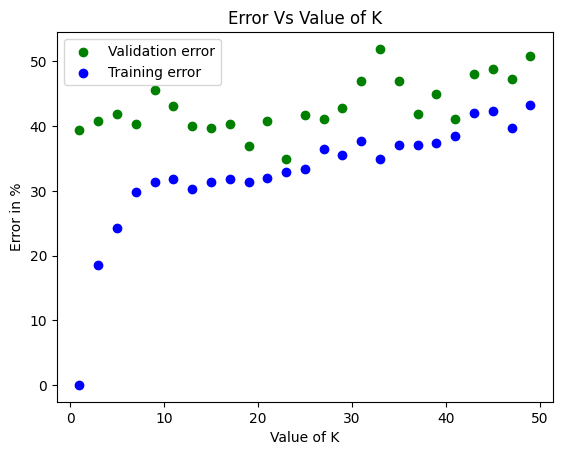

Best value of k is : 23


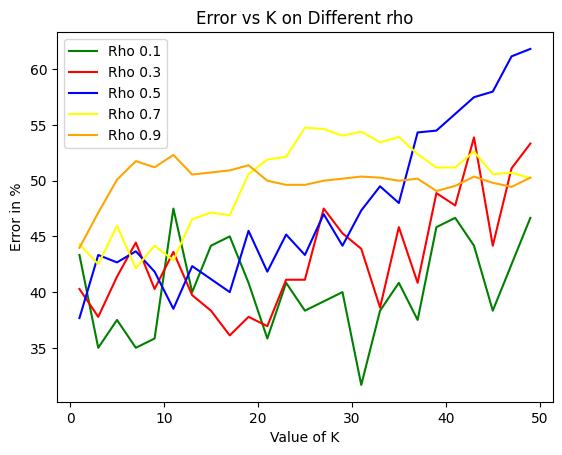

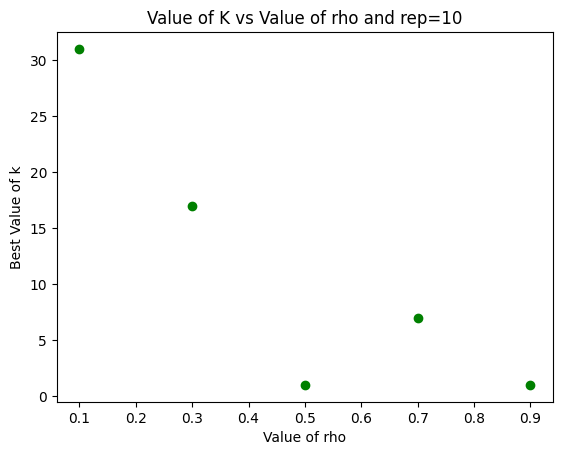

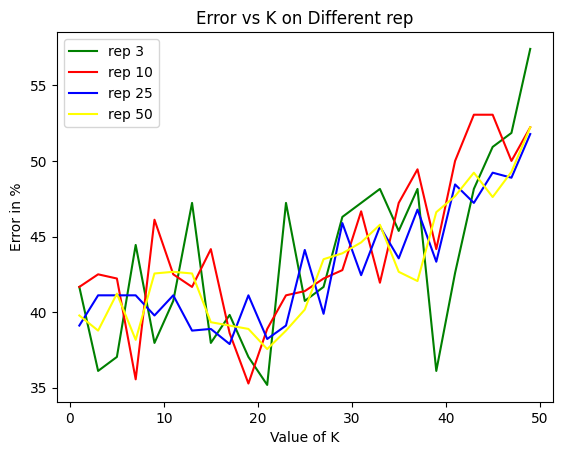

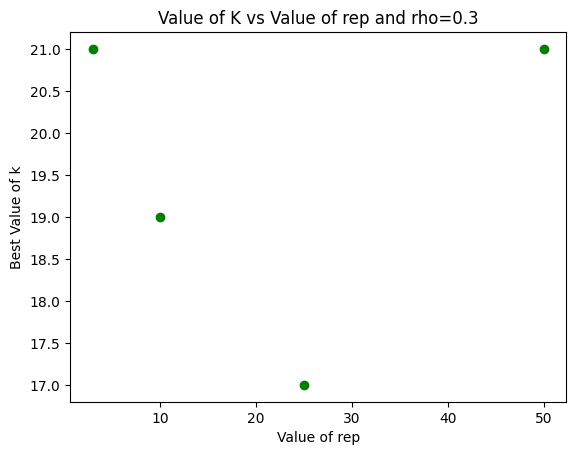

Accuracy of model : 64.58333333333334


In [ ]:
####################################
#Part(c): Parameter selection: What is good value for k?
####################################
#Write holdoutCVkNN() Function
def holdoutCVkNN(k_range,numrep,rho):
  total=int(rho*len(X_train))
  acc_val=[]
  acc_train=[]

  for i in range(1,k_range+1,2):
    A=[]
    B=[]
    for j in range(numrep):
      X_train_sample=[]
      Y_train_sample=[]
      X_train_val=[]
      Y_train_val=[]

      rand_int=random.randint(0,len(X_train)-1)
      X_train_val.append(X_train[rand_int])
      Y_train_val.append(Y_train[rand_int])

      l=[]
      l.append(rand_int)

      k=1
      while(k<total):
        rand_int=random.randint(0,len(X_train)-1)
        if rand_int not in l:
          X_train_val.append(X_train[rand_int])
          Y_train_val.append(Y_train[rand_int])

          l.append(rand_int)
          k=k+1


      for k in range(len(X_train)):
        if k not in l:
          X_train_sample.append(X_train[k])
          Y_train_sample.append(Y_train[k])


      pred=kNNClassify(X_train_sample,Y_train_sample,X_train_val,i)
      mismatch,acc=KNNAccuracy(Y_train_val,pred)
      A.append(acc)

      pred=kNNClassify(X_train_sample,Y_train_sample,X_train_sample,i)
      mismatch,acc=KNNAccuracy(Y_train_sample,pred)
      B.append(acc)

    a=sum(A)/len(A)
    acc_val.append(a)
    b=sum(B)/len(B)
    acc_train.append(b)

  return acc_val,acc_train

  #Iterate through range of k values
    #Iterate through number of repetations
      #Hold out rho fraction of training data in each repetition.
  #Return errors on training and validation data

k_rang=50
acc_val,acc_train=holdoutCVkNN(k_rang,10,0.3)



#Plot training and validation errors for different values of k
error_val=[100-acc_val[i] for i in range(len(acc_val))]
error_train=[100-acc_train[i] for i in range(len(acc_train))]

val_k=[i for i in range(1,k_rang+1,2)]

plt.scatter(val_k,error_val,color="g",label="Validation error")
plt.scatter(val_k,error_train,color="b",label="Training error")
plt.xlabel("Value of K")
plt.ylabel("Error in %")
plt.legend()
plt.title("Error Vs Value of K")
plt.show()



#what is the best value for k?
best_k=0
minimum=error_val[0]
for i in range(len(error_val)):
    if minimum>error_val[i]:
        minimum=error_val[i]
        best_k=i
best_k=2*best_k+1
print("Best value of k is :",best_k)




#Effect of rho and number repetations on k
pro=[0.1,0.3,0.5,0.7,0.9]
colors=["green","red","blue","yellow","orange"]
valuesofk=[]
for i in range(len(pro)):
  acc_val,acc_train=holdoutCVkNN(k_rang,10,pro[i])

  error=[100-acc_val[i] for i in range(len(acc_val))]
  val_k=[i for i in range(1,k_rang+1,2)]

  plt.plot(val_k,error,color=colors[i],label=f"Rho {pro[i]}")
  plt.xlabel("Value of K")
  plt.ylabel("Error in %")
  plt.title("Error vs K on Different rho")

  K=0
  minimum=error[0]
  for i in range(len(error)):
    if minimum>error[i]:
        minimum=error[i]
        K=i
  K=2*K+1
  valuesofk.append(K)
plt.legend()
plt.show()

plt.scatter(pro,valuesofk,color="g")
plt.xlabel("Value of rho")
plt.ylabel("Best Value of k")
plt.title("Value of K vs Value of rho and rep=10")
plt.show()

rep=[3,10,25,50]
valuesofk=[]
for i in range(len(rep)):
  acc_val,acc_train=holdoutCVkNN(k_rang,rep[i],0.3)

  error=[100-acc_val[i] for i in range(len(acc_val))]
  val_k=[i for i in range(1,k_rang+1,2)]

  plt.plot(val_k,error,color=colors[i],label=f"rep {rep[i]}")
  plt.xlabel("Value of K")
  plt.ylabel("Error in %")
  plt.title("Error vs K on Different rep")


  K=0
  minimum=error[0]
  for i in range(len(error)):
    if minimum>error[i]:
        minimum=error[i]
        K=i
  K=2*K+1
  valuesofk.append(K)
plt.legend()
plt.show()

plt.scatter(rep,valuesofk,color="g")
plt.xlabel("Value of rep")
plt.ylabel("Best Value of k")
plt.title("Value of K vs Value of rep and rho=0.3")
plt.show()




#Evaluate the performance on test set with the best hyper parameters ( i.e best k ).
pred=kNNClassify(X_train,Y_train,X_test,best_k)
mismatch_test,acc=KNNAccuracy(Y_test,pred)
print("Accuracy of model :",acc)






The best value of K will be at where Validation error is minimum.

Value of K is high when rho is is small and on increasing rho value of value of K decrease.

Yes there is improvement in model with best value of k.

error in validation is low on low value of rho but it has more up and down but of high value of rho error become steady there is less up and down compare to low value.

error in validation due to high level of rep is increasing but has less up and down as compared to low value of rep

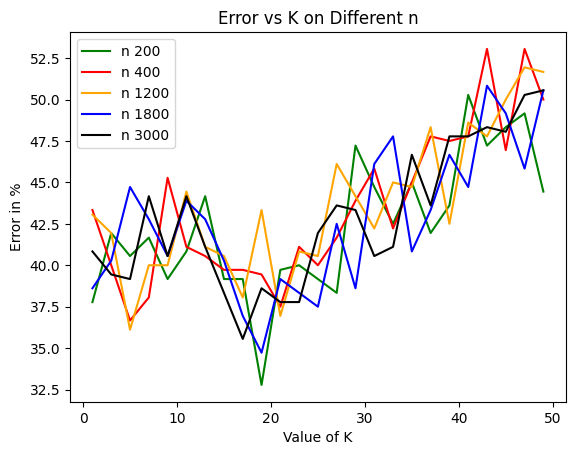

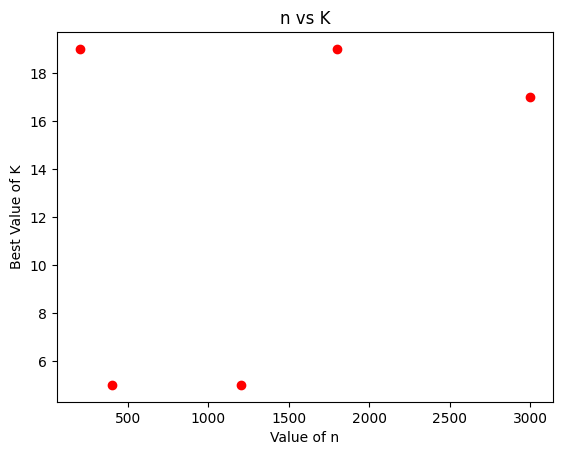

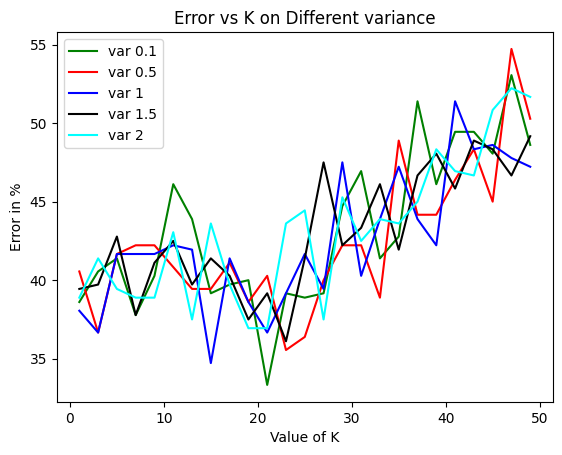

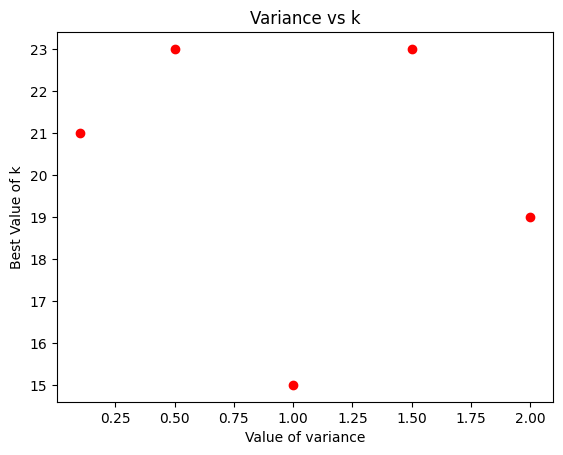

In [ ]:
##################################
#Part(d): Influence of training data on KNN classifier
##################################
#Performance evaluation as n increases

n=[200,400,1200,1800,3000]
vK=[]
colors=["green","red","orange","blue","black","aqua"]
for i in range(len(n)):
  z=int(n[i]/4)
  newsample1=np.random.multivariate_normal(mean1,cov,z)
  newsample2=np.random.multivariate_normal(mean2,cov,z)
  newsample3=np.random.multivariate_normal(mean3,cov,z)
  newsample4=np.random.multivariate_normal(mean4,cov,z)

  #Convert samples into list
  newsample1=newsample1.tolist()
  newsample2=newsample2.tolist()
  newsample3=newsample3.tolist()
  newsample4=newsample4.tolist()

  #Generate training data
  t1=newsample1 + newsample4
  z1=[1 for i in range(len(t1))]

  t2=newsample2 + newsample3
  z2=[-1 for i in  range(len(t2))]

  new_X_train=t1+t2
  new_X_train=np.array(X_train)


  new_Y_train=z1+z2
  new_Y_train=np.array(Y_train)

  new_Training_set=[X_train,Y_train]

  k_range=50
  acc_val,acc_train=holdoutCVkNN(k_range,10,0.3)

  error_val=[100-acc_val[i] for i in range(len(acc_val))]
  val_k=[i for i in range(1,k_range+1,2)]

  plt.plot(val_k,error_val,color=colors[i],label=f"n {n[i]}")



  best_k=0
  minimum=error_val[0]
  for i in range(len(error_val)):
    if minimum>error_val[i]:
      minimum=error_val[i]
      best_k=i
  best_k=2*best_k+1

  vK.append(best_k)
plt.xlabel("Value of K")
plt.ylabel("Error in %")
plt.title("Error vs K on Different n")
plt.legend()
plt.show()

plt.scatter(n,vK,color="r")
plt.xlabel("Value of n")
plt.ylabel("Best Value of K")
plt.title("n vs K")
plt.show()






#Experiments with more difficult data set.
var=[0.1,0.5,1,1.5,2]
vK=[]
colors=["green","red","blue","black","aqua"]
for i in range(len(var)):
  cov=[[var[i],0],[0,var[i]]]
  newsample1=np.random.multivariate_normal(mean1,cov,30)
  newsample2=np.random.multivariate_normal(mean2,cov,30)
  newsample3=np.random.multivariate_normal(mean3,cov,30)
  newsample4=np.random.multivariate_normal(mean4,cov,30)

  #Convert samples into list
  newsample1=newsample1.tolist()
  newsample2=newsample2.tolist()
  newsample3=newsample3.tolist()
  newsample4=newsample4.tolist()

  #Generate training data
  t1=newsample1 + newsample4
  z1=[1 for i in range(len(t1))]

  t2=newsample2 + newsample3
  z2=[-1 for i in  range(len(t2))]

  new_X_train=t1+t2
  new_X_train=np.array(X_train)


  new_Y_train=z1+z2
  new_Y_train=np.array(Y_train)

  new_Training_set=[X_train,Y_train]

  acc_val,acc_train=holdoutCVkNN(k_range,10,0.3)

  error_val=[100-acc_val[i] for i in range(len(acc_val))]
  val_k=[i for i in range(1,k_range+1,2)]

  plt.plot(val_k,error_val,color=colors[i],label=f"var {var[i]}")


  best_k=0
  minimum=error_val[0]
  for i in range(len(error_val)):
    if minimum>error_val[i]:
      minimum=error_val[i]
      best_k=i
  best_k=2*best_k+1

  vK.append(best_k)

plt.xlabel("Value of K")
plt.ylabel("Error in %")
plt.title("Error vs K on Different variance")
plt.legend()
plt.show()

plt.scatter(var,vK,color="r")
plt.xlabel("Value of variance")
plt.ylabel("Best Value of k")
plt.title("Variance vs k")
plt.show()






Error appear to be higher for higher values of k regardless of n.
This suggests that using a larger number of n can improve the accuracy of the knn especially for lower values of k.

Error appear to be higher for higher value of k regardless of variance.
error is less for all variance on lower value of k


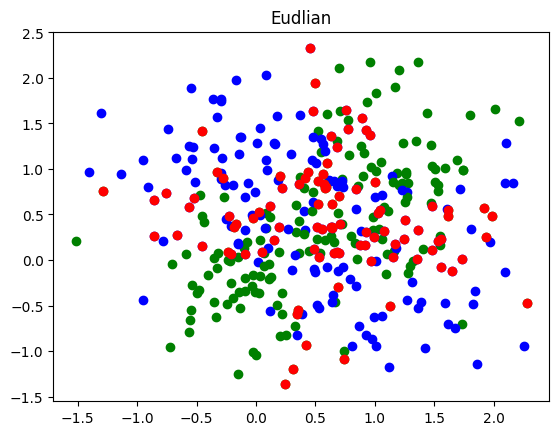

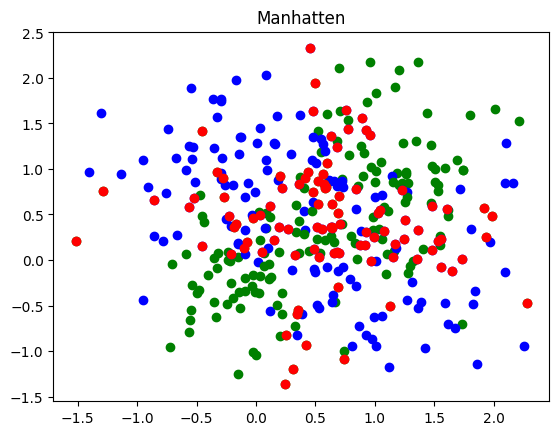

Accuracy of model of euldian distance: 60.416666666666664
Accuracy of model of Manhatten distance: 59.166666666666664


In [ ]:
##################################
#Part(e): Influence of distance measure on KNN classifier
##################################
#Performance evaluation of KNN classifier with different distance measures
def l1andl2(X_train,Y_train,X_test,k):
    pred1=[]
    pred2=[]
    for i in range(len(X_test)):
        dist1=[]
        dist2=[]
        for j in range(len(X_train)):
            d1=math.sqrt((X_train[j][0]-X_test[i][0])**2 + (X_train[j][1]-X_test[i][1])**2)
            dist1.append(d1)
            d2=abs(X_train[j][0]-X_test[i][0]) + abs(X_train[j][1]-X_test[i][1])
            dist2.append(d2)

        p1=0
        p2=0
        for j in range(k):
            min_index1=dist1.index(min(dist1))
            min_index2=dist2.index(min(dist2))

            p1=p1+Y_train[min_index1]
            p2=p2+Y_train[min_index2]

            dist1[min_index1]=float('inf')
            dist2[min_index2]=float('inf')

        if(p1>0):
          pred1.append(1)

        else:
          pred1.append(-1)

        if(p2>0):
          pred2.append(1)
        else:
          pred2.append(-1)


    return pred1,pred2

pred1,pred2=l1andl2(X_train,Y_train,X_test,5)

mismatch_test,acc1=KNNAccuracy(Y_test,pred1)

plt.scatter(x1,y1,color="g")
plt.scatter(x2,y2,color="b")

plt.scatter(x3,y3,color="g")
plt.scatter(x4,y4,color="b")

x5=[mismatch_test[i][0] for i in range(len(mismatch_test))]
y5=[mismatch_test[i][1] for i in range(len(mismatch_test))]
plt.scatter(x5,y5,color="r")
plt.title("Eudlian")

plt.show()

mismatch_test,acc2=KNNAccuracy(Y_test,pred2)

plt.scatter(x1,y1,color="g")
plt.scatter(x2,y2,color="b")

plt.scatter(x3,y3,color="g")
plt.scatter(x4,y4,color="b")

x5=[mismatch_test[i][0] for i in range(len(mismatch_test))]
y5=[mismatch_test[i][1] for i in range(len(mismatch_test))]
plt.scatter(x5,y5,color="r")
plt.title("Manhatten")

plt.show()
print("Accuracy of model of euldian distance:",acc1)
print("Accuracy of model of Manhatten distance:",acc2)



#Understand the decision regions of KNN classifier with different distance measures







Accuracy of model with euldian distance perform better than the Manhatten distance.

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


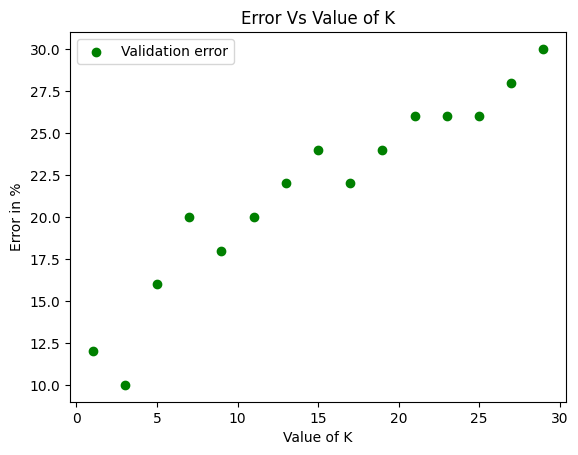

Best value of k is : 3
Euldian distance perform better
Accuracy of model of Manhatten distance and k=3: 80.0
Confusion_matrix :
[[4 0 0 0 0 0 0 0 0 0]
 [0 4 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0]
 [0 0 0 4 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 1]
 [0 1 0 1 0 5 0 0 0 0]
 [1 0 0 0 0 0 4 0 0 0]
 [0 0 0 0 1 0 0 4 0 1]
 [0 0 2 0 0 0 0 0 8 0]
 [0 0 0 0 1 0 1 0 0 5]]


In [ ]:
##################################
#Part(f): Influence of distance measure on KNN classifier
##################################

#Load MNIST data
import math
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
images = mnist.data.to_numpy()
targets = mnist.target.to_numpy()

#Plot a few images
#plt.subplot(211)
#plt.imshow((images[0].reshape(28,28)), cmap=plt.cm.gray_r, interpolation='nearest')
#plt.subplot(212)
#plt.imshow(images[1].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')

#Create train, validation and test splits
images=images.tolist()
targets=targets.tolist()

X_train=images[:700]
Y_train=targets[:700]

X_val=images[700:750]
Y_val=targets[700:750]

X_test=images[750:800]
Y_test=targets[750:800]

#Write 'MultiClassKNNClassify' function
def MultiClassKNNClassify(X_train,Y_train,X_test,k):
    pred1=[]
    pred2=[]
    for i in range(len(X_test)):
        dist1=[]
        dist2=[]
        for j in range(len(X_train)):
            d1=0
            d2=0
            for w in range(len(X_train[j])):
              d1=d1 + (X_train[j][w]-X_test[i][w])**2
              d2=d2 + abs(X_train[j][w]-X_test[i][w])

            d1=math.sqrt(d1)
            dist1.append(d1)
            dist2.append(d2)

        p1=[0,0,0,0,0,0,0,0,0,0]
        p2=[0,0,0,0,0,0,0,0,0,0]

        for j in range(k):
          min_index1=dist1.index(min(dist1))
          c1=int(Y_train[min_index1])
          p1[c1]=p1[c1]+1
          dist1[min_index1]=float('inf')

          min_index2=dist2.index(min(dist2))
          c2=int(Y_train[min_index2])
          p2[c2]=p2[c2]+1
          dist2[min_index2]=float('inf')

        pred1.append(str(p1.index(max(p1))))
        pred2.append(str(p2.index(max(p2))))


    return pred1,pred2


def MultiKNNAccuracy(true,pred):
  c=0

  for i in range(len(true)):
      if (true[i]==pred[i]):
          c=c+1

  acc=(c/len(true))*100
  return acc

#Empirically chose most suitable k and error function based on the evauation on cross-validation data
#Evaluate the performance using different values of 'k' on the validation data and select the optimal 'k' for the test data.
#Evaluation the performance using different distance measures (l1,l2, etc) on the validation data and select the optimal distance measure for test data.
def crosskNN(k_range,numrep):
  acc_val=[]

  for i in range(1,k_range+1,2):
    A=[]
    for j in range(numrep):

      pred1,pred2=MultiClassKNNClassify(X_train,Y_train,X_val,i)
      acc=MultiKNNAccuracy(Y_val,pred1)
      A.append(acc)

    a=sum(A)/len(A)
    acc_val.append(a)

  return acc_val

k_range=30
acc_val=crosskNN(k_range,3)

error_val=[100-acc_val[i] for i in range(len(acc_val))]
val_k=[i for i in range(1,k_range+1,2)]

plt.scatter(val_k,error_val,color="g",label="Validation error")
plt.xlabel("Value of K")
plt.ylabel("Error in %")
plt.legend()
plt.title("Error Vs Value of K")
plt.show()

#best value for k?
best_k=0
minimum=error_val[0]
for i in range(len(error_val)):
    if minimum>error_val[i]:
        minimum=error_val[i]
        best_k=i
best_k=2*best_k+1
print("Best value of k is :",best_k)

#distance
pred1,pred2=MultiClassKNNClassify(X_train,Y_train,X_val,best_k)

acc1=MultiKNNAccuracy(Y_test,pred1)
acc2=MultiKNNAccuracy(Y_test,pred2)

if (acc1>acc2):
  print("Euldian distance perform better")
else:
  print("Manhatten distance perform better")



#Evaluate the performance on test data with the best hyper parameters ( k, error_func ) obtained from cross validation

pred1,pred2=MultiClassKNNClassify(X_train,Y_train,X_test,best_k)

acc1=MultiKNNAccuracy(Y_test,pred1)
acc2=MultiKNNAccuracy(Y_test,pred2)

if (acc1>acc2):
  print(f"Accuracy of model of euldian distance and k={best_k}:",acc1)
  pred=pred1
else:
  print(f"Accuracy of model of Manhatten distance and k={best_k}:",acc2)
  pred=pred2


#Create a confusion matrix for test data
def compute_confusion_matrix(true, pred):
  cm=[]
  for i in range(10):
    l=[0 for i in range(10)]
    cm.append(l)
  for i in range(len(true)):
    cm[int(true[i])][int(pred[i])]=cm[int(true[i])][int(pred[i])]+1

  return cm


    #Inputs: Ground truth labels and classifier predictions
    #Outputs: Confusion matrix

cm=compute_confusion_matrix(Y_test,pred)
cm=np.array(cm)
print("Confusion_matrix :")
print(cm)



#Suggest an alternative ways to improve performance





On large data set it is taking to much time.I done my output on 700 training set,50 validation set ,50 test set

We get different accuracy on each time as I am using random sample to generate best k .Based on K we get different accuracy.

Accuracy on Minst validation and test data is 80%

In confusion matrix
row represent True value
Column represent Predicted value

<b> Report your observations </b>
1. Write down the best accuracy on synthetic test data generated from Gaussian distribution

2. Write down the best accuracy on MNIST validation and test data.

3. Report your observations on the confusion matrix of KNN classifier on MNIST test data

4.